In [5]:
import sys
sys.path.insert(0,'../')
import os
#run on cpu to not interfere with trianing
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from net.hourglass import HourglassNet
from eval.heatmap_process import post_process_heatmap
import glob
import cv2
import matplotlib.pyplot as plt
import scipy
import imageio
from top.demo import render_joints
import numpy as np

In [17]:
num_class=14
num_stack=2
model_dir="../../trained_models/mpii_no_augment"
model_json="net_arch.json"
epoch=6
model_weights="weights_epoch"+str(epoch)+".h5"
inres=(256, 256)
outres=(64,64)
xnet = HourglassNet(num_class, num_stack, inres, outres)
model_json=os.path.join(model_dir, model_json)
model_weights=os.path.join(model_dir, model_weights)

xnet.load_model(model_json, model_weights)


lspet_0.jpg
(64, 64, 14)
(64, 64)


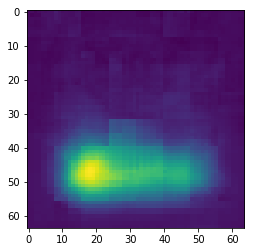

(64, 64)


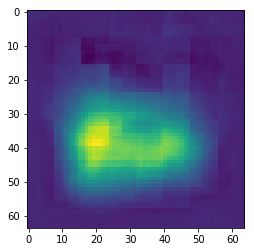

(64, 64)


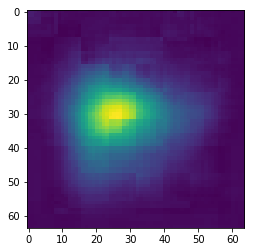

(64, 64)


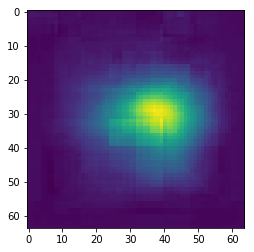

(64, 64)


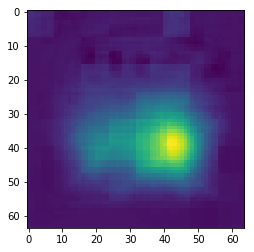

(64, 64)


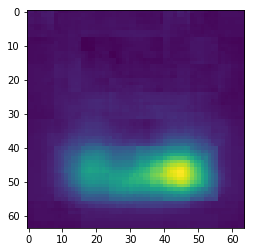

(64, 64)


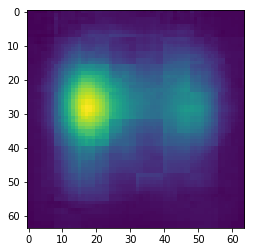

(64, 64)


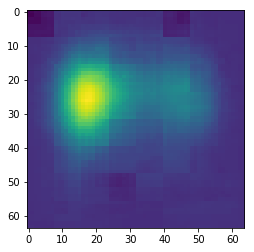

(64, 64)


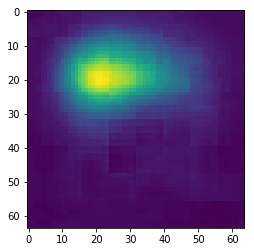

(64, 64)


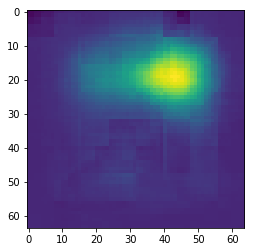

(64, 64)


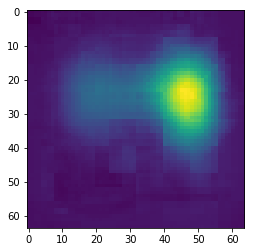

(64, 64)


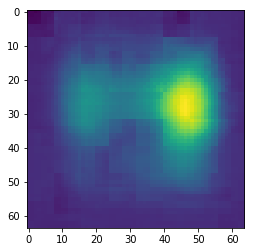

(64, 64)


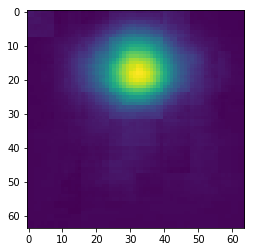

(64, 64)


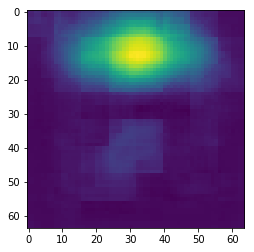

[(44.15625, 77.109375, 0.18327), (46.609375, 63.984375, 0.16179833), (63.78125, 49.21875, 0.24081483), (90.765625, 47.578125, 0.22779423), (103.03125, 63.984375, 0.21430482), (110.390625, 77.109375, 0.19206303), (41.703125, 45.9375, 0.18406156), (41.703125, 42.65625, 0.24641484), (51.515625, 32.8125, 0.2518608), (105.484375, 31.171875, 0.25249442), (112.84375, 39.375, 0.22466482), (112.84375, 45.9375, 0.17205101), (78.5, 29.53125, 0.4076072), (78.5, 21.328125, 0.295059)]


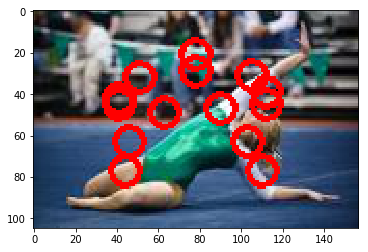

yoga2.jpg
(64, 64, 14)
(64, 64)


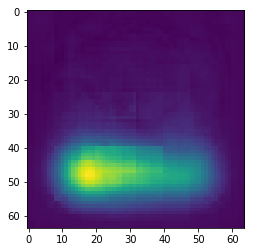

(64, 64)


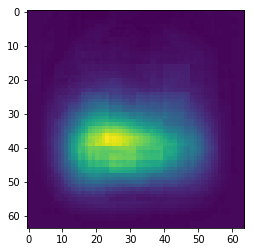

(64, 64)


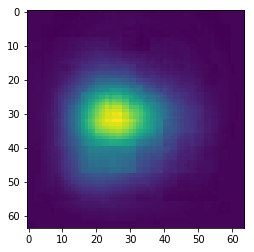

(64, 64)


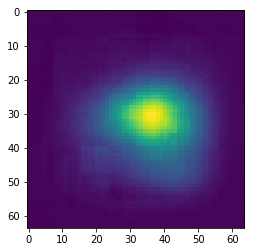

(64, 64)


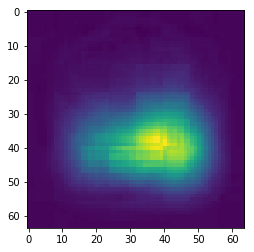

(64, 64)


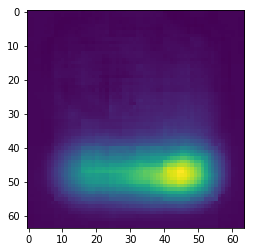

(64, 64)


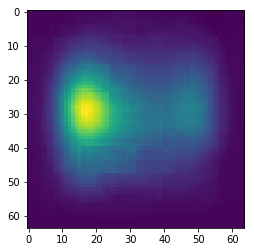

(64, 64)


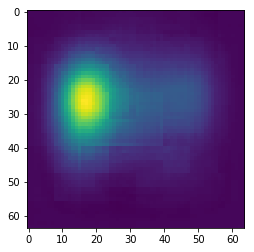

(64, 64)


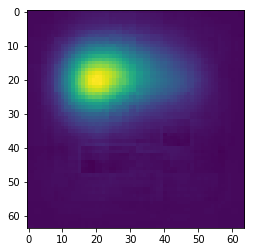

(64, 64)


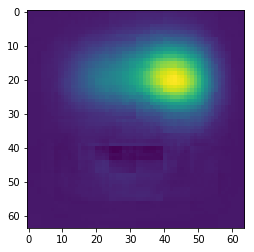

(64, 64)


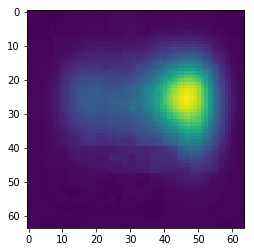

(64, 64)


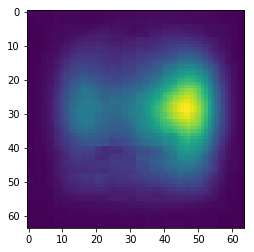

(64, 64)


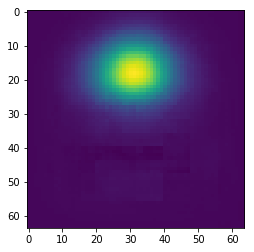

(64, 64)


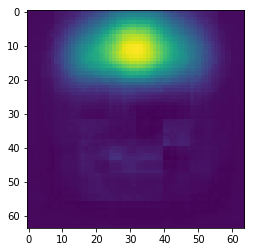

[(174.375, 261.75, 0.17914781), (222.8125, 201.765625, 0.18975832), (251.875, 174.5, 0.22919424), (358.4375, 163.59375, 0.22557339), (368.125, 207.21875, 0.19379026), (426.25, 256.296875, 0.18565552), (164.6875, 158.140625, 0.18019406), (164.6875, 141.78125, 0.24613538), (193.75, 109.0625, 0.27662858), (416.5625, 109.0625, 0.2620738), (455.3125, 136.328125, 0.22374359), (445.625, 158.140625, 0.16802819), (300.3125, 98.15625, 0.43852115), (310.0, 59.984375, 0.29499888)]


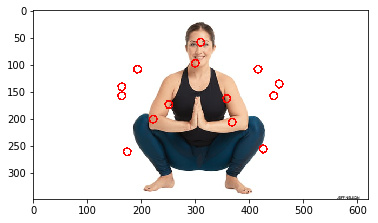

yoga1.jpg
(64, 64, 14)
(64, 64)


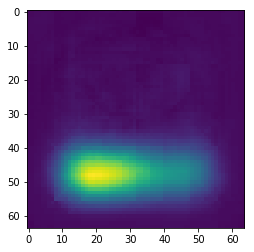

(64, 64)


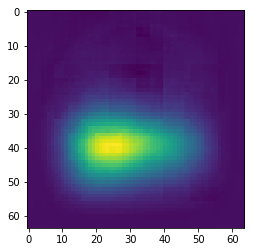

(64, 64)


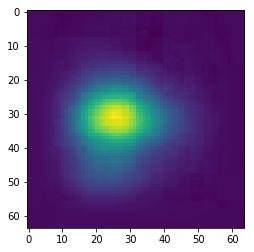

(64, 64)


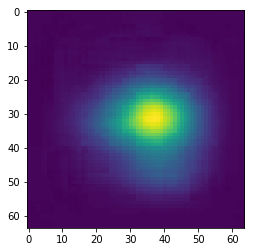

(64, 64)


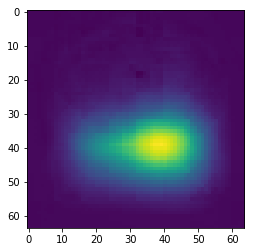

(64, 64)


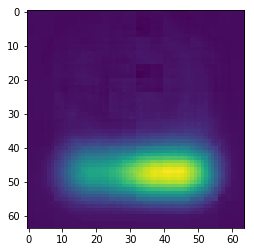

(64, 64)


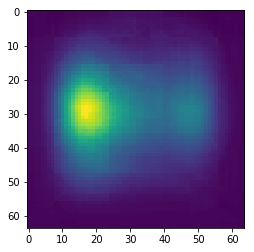

(64, 64)


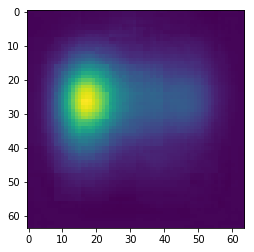

(64, 64)


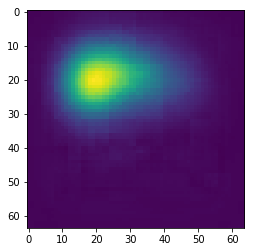

(64, 64)


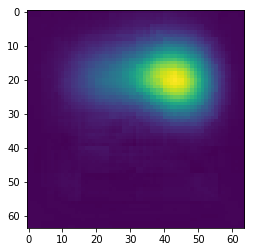

(64, 64)


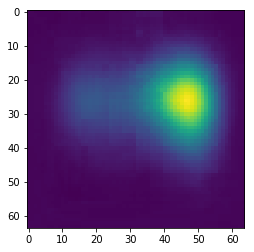

(64, 64)


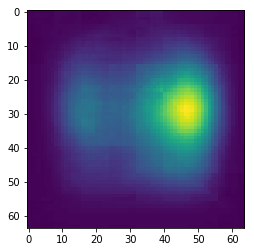

(64, 64)


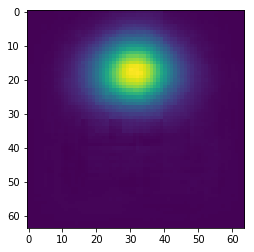

(64, 64)


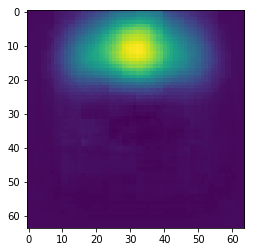

[(184.0625, 465.0, 0.20690195), (242.1875, 377.8125, 0.22170746), (242.1875, 300.3125, 0.2528455), (358.4375, 300.3125, 0.25524038), (377.8125, 377.8125, 0.23896153), (397.1875, 455.3125, 0.1925723), (164.6875, 280.9375, 0.18383874), (164.6875, 251.875, 0.2614112), (184.0625, 193.75, 0.2892842), (416.5625, 193.75, 0.28555557), (445.625, 251.875, 0.24551298), (445.625, 280.9375, 0.17932492), (310.0, 174.375, 0.45061216), (310.0, 106.5625, 0.30055863)]


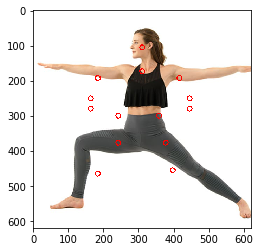

mpii_0.jpg
(64, 64, 14)
(64, 64)


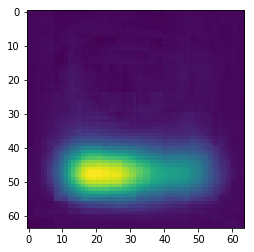

(64, 64)


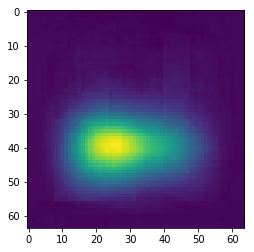

(64, 64)


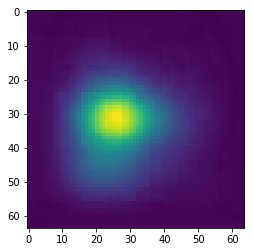

(64, 64)


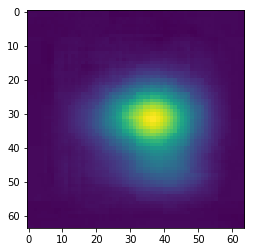

(64, 64)


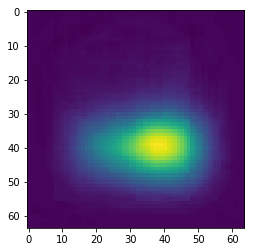

(64, 64)


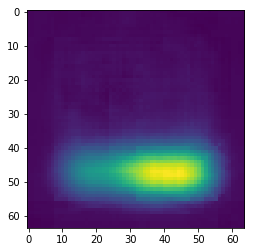

(64, 64)


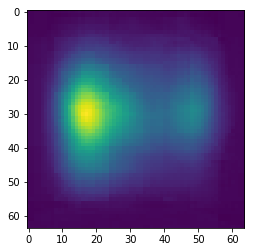

(64, 64)


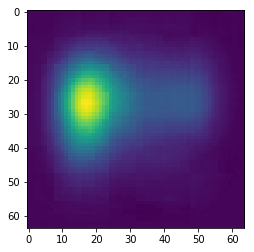

(64, 64)


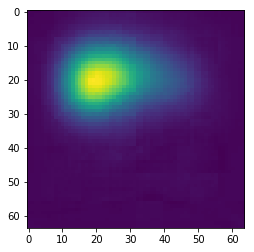

(64, 64)


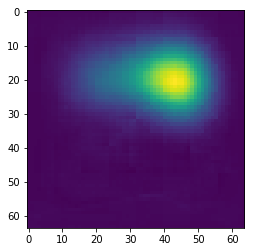

(64, 64)


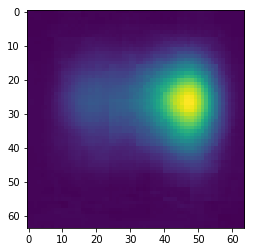

(64, 64)


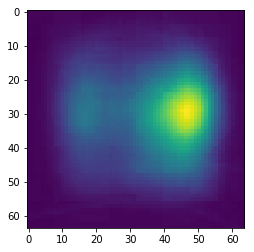

(64, 64)


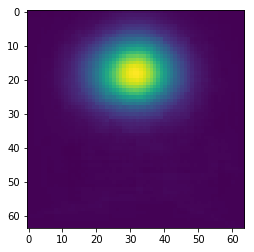

(64, 64)


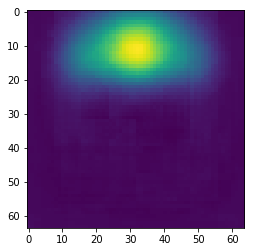

[(380.0, 540.0, 0.18605396), (520.0, 438.75, 0.21628456), (520.0, 360.0, 0.23744567), (720.0, 348.75, 0.23369156), (780.0, 438.75, 0.22756496), (880.0, 540.0, 0.17924319), (340.0, 337.5, 0.17609501), (340.0, 303.75, 0.2460425), (380.0, 225.0, 0.2813169), (860.0, 236.25, 0.27722374), (940.0, 292.5, 0.23212299), (920.0, 326.25, 0.17305858), (620.0, 202.5, 0.4437173), (640.0, 123.75, 0.29539564)]


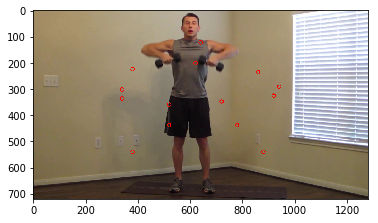

sample.jpg
(64, 64, 14)
(64, 64)


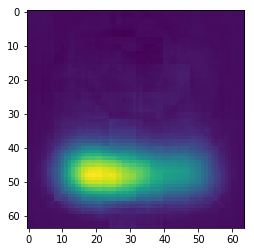

(64, 64)


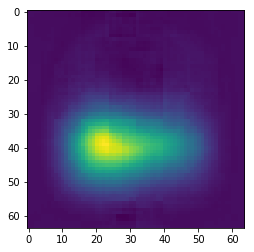

(64, 64)


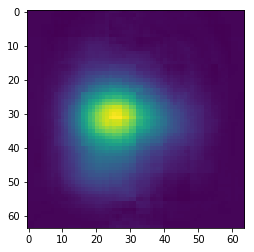

(64, 64)


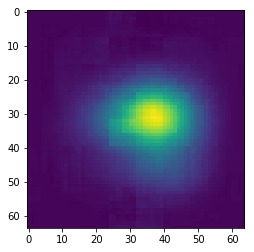

(64, 64)


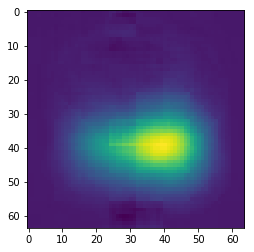

(64, 64)


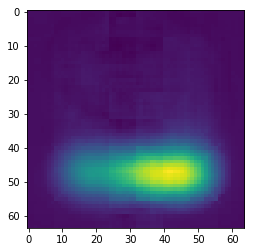

(64, 64)


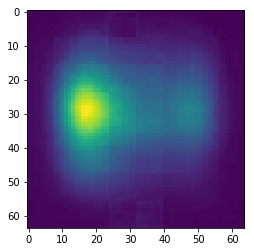

(64, 64)


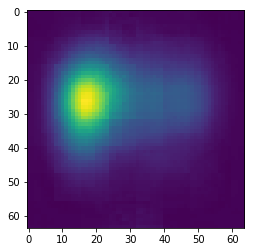

(64, 64)


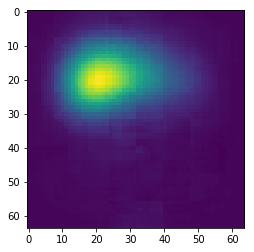

(64, 64)


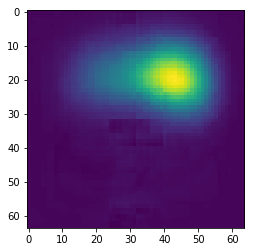

(64, 64)


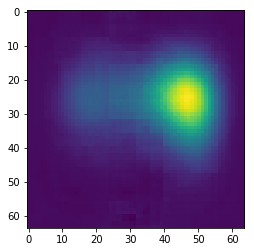

(64, 64)


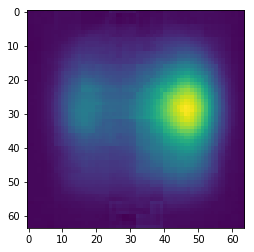

(64, 64)


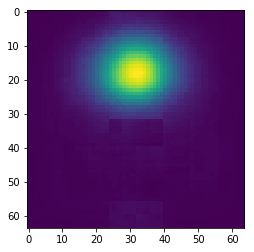

(64, 64)


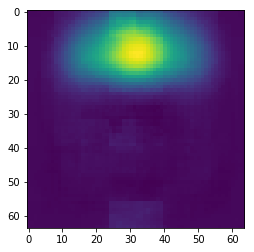

[(320.625, 1080.0, 0.2013377), (371.25, 877.5, 0.22733921), (438.75, 697.5, 0.25989816), (624.375, 697.5, 0.25754502), (658.125, 877.5, 0.2293377), (691.875, 1057.5, 0.19854519), (286.875, 652.5, 0.18705025), (286.875, 585.0, 0.26149946), (354.375, 427.5, 0.28317398), (725.625, 450.0, 0.2816555), (776.25, 585.0, 0.23799434), (776.25, 630.0, 0.17606175), (540.0, 405.0, 0.4598753), (540.0, 270.0, 0.3087683)]


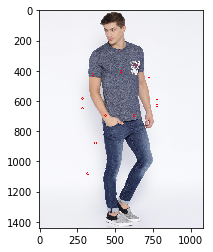

In [18]:
img_dir="../../data/test_images"
# load files from data generator

for file in os.listdir(img_dir):
    print(file)
    img_file=os.path.join(img_dir,file)
    out,scale = xnet.inference_file(img_file)

    kps = post_process_heatmap(out[0,:,:,:])
    #first element of batch
    out=out[0]
    print(out.shape)
    for j in range(out.shape[-1]):
        print(out[:,:,j].shape)
        plt.imshow(out[:,:,j])
        plt.show()
    mkps = list() 
    for i, _kp in enumerate(kps):
        _conf = _kp[2]
        mkps.append((_kp[0]*scale[1]*4, _kp[1]*scale[0]*4, _conf))
    print(mkps)
    #normally conf th is around 0.2 but currently no joints are found
    cvmat = render_joints(imageio.imread(img_file), mkps, conf_th=0.002)
    plt.imshow(cvmat)
    plt.show()
